<a href="https://colab.research.google.com/github/01aleem/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Capstone 2- Regression/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')


In [4]:
print(df.head)

<bound method NDFrame.head of        Date   Open   High    Low  Close
0    Jul-05  13.00  14.00  11.25  12.46
1    Aug-05  12.58  14.88  12.55  13.42
2    Sep-05  13.48  14.87  12.27  13.30
3    Oct-05  13.20  14.47  12.40  12.99
4    Nov-05  13.35  13.88  12.88  13.41
..      ...    ...    ...    ...    ...
180  Jul-20  25.60  28.30  11.10  11.95
181  Aug-20  12.00  17.16  11.85  14.37
182  Sep-20  14.30  15.34  12.75  13.15
183  Oct-20  13.30  14.01  12.11  12.42
184  Nov-20  12.41  14.90  12.21  14.67

[185 rows x 5 columns]>


In [5]:
df.shape

(185, 5)

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df.describe(include = 'all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Sep-10,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [9]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [10]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


In [11]:
df.corrwith(df.Close)

Open     0.977971
High     0.985051
Low      0.995358
Close    1.000000
dtype: float64

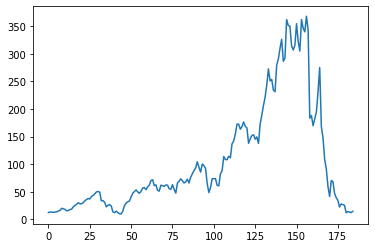

In [12]:
line= df['Close'].plot.line()

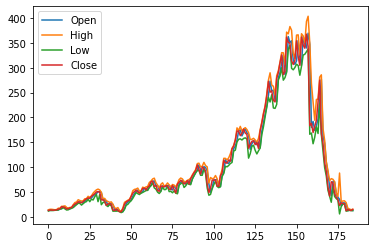

In [13]:
df.plot.line()

In [14]:
X = df[['High','Low','Open']]
y = df[['Close']]

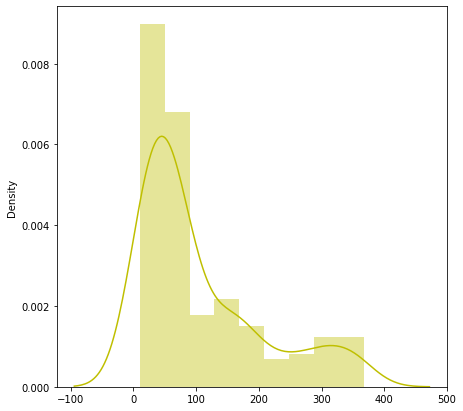

In [17]:
# checking the distribution of the dependent variable

plt.figure(figsize=(7,7))
sns.distplot(y,color="y")

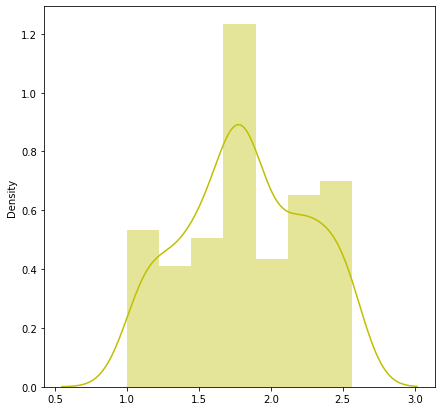

In [20]:
# applying log transformation

plt.figure(figsize=(7,7))
sns.distplot(np.log10(y),color="y")

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=25)

In [66]:
X_train.shape

(138, 3)

In [67]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
y_predict = model.predict(X_test)
y_predict

array([[ 48.30808793],
       [108.30520334],
       [ 30.81676789],
       [345.99658617],
       [299.54004613],
       [249.46950533],
       [353.65169696],
       [318.29689626],
       [140.78982589],
       [ 35.65002676],
       [ 69.84614155],
       [ 45.95883433],
       [ 62.36628198],
       [ 58.02324731],
       [ 54.38624985],
       [ 11.71702596],
       [ 60.32121001],
       [ 74.13589786],
       [ 39.95305923],
       [ 62.50899171],
       [ 48.85079151],
       [ 74.09531853],
       [ 14.44095362],
       [ 90.5233311 ],
       [341.53306757],
       [ 47.33189128],
       [ 17.01190007],
       [322.31387853],
       [ 40.08265174],
       [ 14.70823888],
       [167.26502505],
       [118.27006599],
       [134.8904143 ],
       [ 17.92650184],
       [ 65.25909043],
       [ 14.82677276],
       [ 54.31227191],
       [ 33.68710415],
       [ 36.93395824],
       [ 56.47979654],
       [ 18.67263356],
       [ 69.95468214],
       [ 51.38461136],
       [ 20

In [71]:
model.intercept_ # y intercept(c)

array([7.70518672])

In [72]:
model.coef_ # coefficient

array([[ 189.40044235,  345.21331565, -166.51702307]])

In [73]:
r2_score(y_test,y_predict) # Without MinMax Scaler: 0.9967865783745083

0.9967865783745083

In [74]:
mean_absolute_error(y_test,y_predict)

3.7812700694460943

In [75]:
mean_squared_error(y_test,y_predict)

35.62538681522711